In [1]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_inference.csv')

In [3]:
df.head()

,path,real,0,1,2,3,4
0,../input/drunstratified/content/non_stratified...,0,37.06,38.11,21.89,2.94,0.00
1,../input/drunstratified/content/non_stratified...,0,43.60,27.91,22.77,5.72,0.00
2,../input/drunstratified/content/non_stratified...,0,46.30,29.55,22.92,1.23,0.00
3,../input/drunstratified/content/non_stratified...,0,50.46,26.26,20.61,2.67,0.00
4,../input/drunstratified/content/non_stratified...,0,42.10,30.81,16.89,0.00,10.19


In [4]:
df['predicted'] = df.iloc[:, 2:].idxmax(axis=1)

In [5]:
df['predicted'] = pd.to_numeric(df.predicted)

In [6]:
precision_score(df.real, df.predicted,  average='macro')

0.7646710891382111

In [7]:
recall_score(df.real, df.predicted,  average='macro')

0.6689623696269592

In [8]:
accuracy_score(df.real, df.predicted)

0.8729965182388458

In [9]:
confusion_matrix(df.real, df.predicted)

array([[48623,  1161,   519,     8,    26],
       [ 2661,  2094,   282,     5,     9],
       [ 2053,   525,  6918,   225,   102],
       [   53,    20,   539,   915,    34],
       [   79,     9,   199,   136,   874]])

<AxesSubplot:>

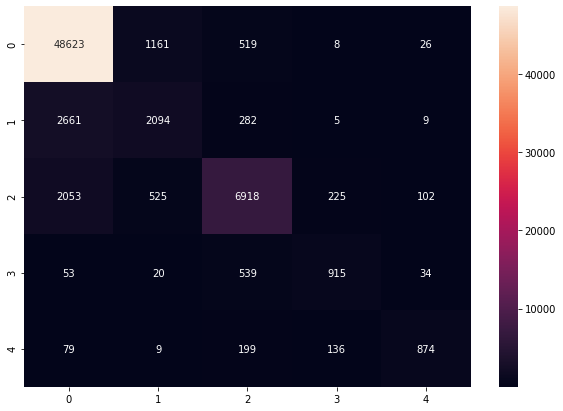

In [12]:
df_cm = pd.DataFrame(confusion_matrix(df.real, df.predicted), index = [i for i in "01234"],
                  columns = [i for i in "01234"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  fmt='g')

### Problems:

1. More than 50% of Grade 1 is being predicted as Grade 0
2. A significant Grade 2 is being predicted as Grade 0
3. Check images from Grade 0 being predicted as Grade 4
4. Check images from Grade 4 being predicted as Grade 0